In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = load_iris()

In [4]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
df1 = pd.DataFrame(df.data, columns =  df.feature_names)

In [11]:
df1['Species'] = df.target

In [12]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output,Species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [13]:
import seaborn as sns

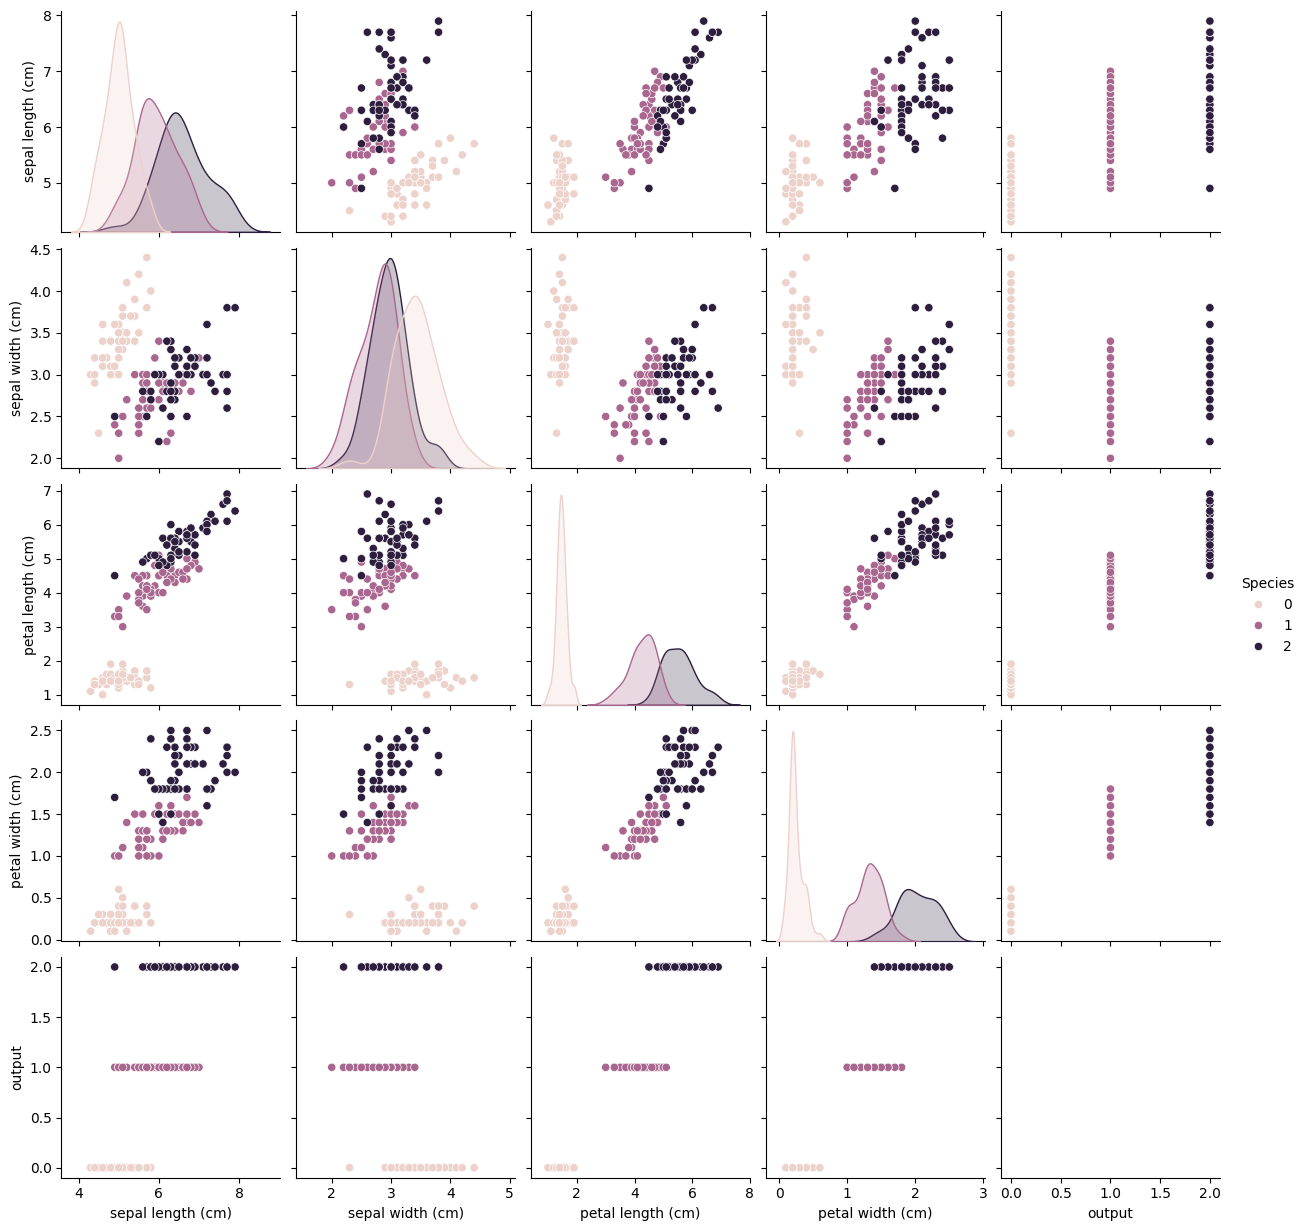

In [14]:
sns.pairplot(df1, hue = 'Species')

In [17]:
new_df = df1[df1['Species']!=0][['sepal length (cm)', 'sepal width (cm)', 'Species']]

In [18]:
new_df

,sepal length (cm),sepal width (cm),Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [20]:
new_df.shape

(100, 3)

In [21]:
X = new_df.iloc[: , 0:2]
y = new_df.iloc[:, -1]

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [31]:
estimators = [('lr', clf1), ('rf', clf2), ('knn', clf3)]

In [32]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring = 'accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

lr 0.75
rf 0.6
knn 0.62


In [33]:
from sklearn.ensemble import VotingClassifier


In [34]:
#HARD VOTING

In [36]:
vc = VotingClassifier(estimators=estimators)
x = cross_val_score(vc, X, y, cv = 10, scoring = 'accuracy')
print(np.round(np.mean(x), 2))

0.66


In [37]:
#SOFT VOTING

In [38]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc1, X, y, cv = 10, scoring = 'accuracy')
print(np.round(np.mean(x), 2))

0.65


In [39]:
#CLASSIFIERS FO SAME ALGORITHM

In [40]:
from sklearn.svm import SVC

In [41]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_redundant=5, n_informative=15, random_state=2)

In [42]:
svm1 = SVC(probability=True, kernel = 'poly', degree=1)
svm2 = SVC(probability=True, kernel = 'poly', degree=2)
svm3 = SVC(probability=True, kernel = 'poly', degree=3)
svm4 = SVC(probability=True, kernel = 'poly', degree=4)
svm5 = SVC(probability=True, kernel = 'poly', degree=5)

In [43]:
estimators = [('svm1', svm1), ('svm2', svm2), ('svm3', svm3), ('svm4', svm4), ('svm5', svm5)]

In [45]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv = 10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [48]:
vc1 = VotingClassifier(estimators=estimators, voting = 'soft')
x = cross_val_score(vc1, X, y, cv=10, scoring = 'accuracy')
print(np.round(np.mean(x), 2))

0.93
